# Exercice 3
https://foad.univ-rennes1.fr/pluginfile.php/1813065/mod_resource/content/1/TP_34.pdf



## imports

In [ ]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten# layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   # save model
from tensorflow.keras.models import load_model   # load saved model
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Loading the dataset

Preview dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TP_ESIR2/IA/IMDB Dataset.csv')

print(data)

FileNotFoundError: ignored

Declaration of the stop word

In [ ]:
english_stops = set(stopwords.words('english'))


## Clean Dataset

Our first function retreives the dataset and removes the unwanted data from the texts such as the html tags, the non alphabet and the stopwords. Then is replaces the output by 0 or 1.

In [ ]:
def load_dataset():
    df = pd.read_csv('/content/drive/MyDrive/TP_ESIR2/IA/IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


### Splitting and shuffling dataset

Here we split the dataset into 2 parts, the training set and the test set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
42051    [my, partner, i, never, heard, movie, decided,...
43782    [i, first, saw, movie, originally, came, i, yr...
23111    [eh, i, watch, movie, class, someone, taped, b...
42957    [as, native, bolton, film, obvious, appeal, th...
5218     [really, dreadful, cheat, film, its, minute, r...
                               ...                        
42457    [what, ever, happened, one, innovative, brilli...
26973    [in, aftermath, september, th, new, york, dram...
11227    [what, executive, producer, movie, if, i, reme...
4286     [this, depiction, forlorn, japanese, forces, p...
24859    [just, moved, new, cottage, english, country, ...
Name: review, Length: 40000, dtype: object 

42841    [given, acting, roles, played, casper, gutman,...
21593    [a, great, addition, anyone, collection, monke...
9258     [surprisingly, kieslowski, movie, disappointin...
37103    [the, movie, opens, beautiful, landscape, shot...
43344    [all, dogs, go, heaven, one, best, movies, i, ...
 

Function calculating the max review length

In [ ]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

### Tokenize and Pad/Truncate Reviews

Encoding each word into a index

In [ ]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[  213  1899     1 ...     0     0     0]
 [    1    23   121 ...    74 11975  1775]
 [ 6139     1    33 ...     0     0     0]
 ...
 [  105  3522  1147 ...     0     0     0]
 [    8  2731 17938 ...     0     0     0]
 [  441  1535    81 ...     0     0     0]] 

Encoded X Test
 [[  262    41   502 ... 18114 41202  8131]
 [   39    22  1559 ...     0     0     0]
 [ 1165 10032     3 ...  1015   381    77]
 ...
 [  775    54    23 ...     0     0     0]
 [  810  1254   293 ...     0     0     0]
 [    8     3   132 ...     0     0     0]] 

Maximum review length:  130


## Build Architecture/Model


Our first model is a simple one with a embeding and a LSTM layer.

In [ ]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           2953280   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,978,177
Trainable params: 2,978,177
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [ ]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
FirstHistory = model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint],validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - ETA: 0s - loss: 0.4574 - accuracy: 0.7548
Epoch 1: accuracy improved from -inf to 0.75480, saving model to models/LSTM.h5
313/313 [==============================] - 56s 170ms/step - loss: 0.4574 - accuracy: 0.7548 - val_loss: 0.2977 - val_accuracy: 0.8827
Epoch 2/5
313/313 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.9249
Epoch 2: accuracy improved from 0.75480 to 0.92493, saving model to models/LSTM.h5
313/313 [==============================] - 54s 174ms/step - loss: 0.2090 - accuracy: 0.9249 - val_loss: 0.2951 - val_accuracy: 0.8877
Epoch 3/5
313/313 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9641
Epoch 3: accuracy improved from 0.92493 to 0.96410, saving model to models/LSTM.h5
313/313 [==============================] - 53s 169ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.3447 - val_accuracy: 0.8767
Epoch 4/5
313/313 [==============================] - ETA: 0s - loss

## Testing

The first line had to be modified because it was depreciated in this version of tensorflow.

In [ ]:
#y_pred = model.predict_classes(x_test, batch_size = 128)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 8693
Wrong Prediction: 1307
Accuracy: 86.92999999999999


In [ ]:
loss,accuracy = model.evaluate(x_train,y_train)

1250/1250 [==============================] - 20s 16ms/step - loss: 0.0354 - accuracy: 0.9909


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.4597 - accuracy: 0.8693


The model is highly overfitted so we decided to add dropout layers

## Adding Dropout

In [ ]:
EMBED_DIM = 32
LSTM_OUT = 64

DrpModel = Sequential()
DrpModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
DrpModel.add(Dropout(0.8))
DrpModel.add(LSTM(LSTM_OUT))
DrpModel.add(Dropout(0.8))
DrpModel.add(Dense(1, activation='sigmoid'))
DrpModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(DrpModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           2953280   
                                                                 
 dropout (Dropout)           (None, 130, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,978,177
Trainable params: 2,978,177
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
DropHistory = DrpModel.fit(x_train, y_train, batch_size = 128, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 58s 178ms/step - loss: 0.6939 - accuracy: 0.5029 - val_loss: 0.6921 - val_accuracy: 0.5459
Epoch 2/5
313/313 [==============================] - 55s 176ms/step - loss: 0.5547 - accuracy: 0.7266 - val_loss: 0.3269 - val_accuracy: 0.8652
Epoch 3/5
313/313 [==============================] - 55s 175ms/step - loss: 0.3483 - accuracy: 0.8727 - val_loss: 0.2930 - val_accuracy: 0.8792
Epoch 4/5
313/313 [==============================] - 55s 175ms/step - loss: 0.2625 - accuracy: 0.9060 - val_loss: 0.2891 - val_accuracy: 0.8878
Epoch 5/5
313/313 [==============================] - 55s 175ms/step - loss: 0.2134 - accuracy: 0.9247 - val_loss: 0.2892 - val_accuracy: 0.8911


In [ ]:
loss,accuracy = DrpModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 21s 16ms/step - loss: 0.1112 - accuracy: 0.9639


In [ ]:
loss,accuracy = DrpModel.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2892 - accuracy: 0.8911


We first tested with 0.2 of dropout which almost did not change the results, so we decided to switch to 0.5 which gave us the losses of 0.0434 for the training set and 0.3584 for the test set. <br>
To get more noticeable results we tried with 0.8. We managed to reduce the test loss to 0.2709 but it was still higher than the train loss which was 0.1081<br>
We deduced from this that the overfiting issue could not be solved only by adding dropout so we switched to network size modification.
<hr>

## Reducing the network size

In [ ]:
EMBED_DIM = 4
LSTM_OUT = 6

SmalModel = Sequential()
SmalModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
SmalModel.add(LSTM(LSTM_OUT))
SmalModel.add(Dense(1, activation='sigmoid'))
SmalModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(SmalModel.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 4)            369160    
                                                                 
 lstm_2 (LSTM)               (None, 6)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 369,431
Trainable params: 369,431
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
SmalHistory =SmalModel.fit(x_train, y_train, batch_size = 128, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 18s 50ms/step - loss: 0.6710 - accuracy: 0.5594 - val_loss: 0.5437 - val_accuracy: 0.7925
Epoch 2/5
313/313 [==============================] - 15s 49ms/step - loss: 0.3553 - accuracy: 0.8645 - val_loss: 0.3161 - val_accuracy: 0.8745
Epoch 3/5
313/313 [==============================] - 15s 49ms/step - loss: 0.2151 - accuracy: 0.9275 - val_loss: 0.3140 - val_accuracy: 0.8790
Epoch 4/5
313/313 [==============================] - 15s 49ms/step - loss: 0.1498 - accuracy: 0.9556 - val_loss: 0.3347 - val_accuracy: 0.8777
Epoch 5/5
313/313 [==============================] - 15s 49ms/step - loss: 0.1085 - accuracy: 0.9708 - val_loss: 0.3473 - val_accuracy: 0.8774


In [ ]:
loss,accuracy = SmalModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 10s 8ms/step - loss: 0.0775 - accuracy: 0.9830


In [ ]:
loss,accuracy = SmalModel.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3473 - accuracy: 0.8774


We first reduced the numbers of node by two with 
```
EMBED_DIM = 16
LSTM_OUT = 32
```
but the result we got from this were still overfited with an loss of 0.06 for the train and 0.36 for the test, so we decided to divide it again by two.<br>
But it was again overfited, with loss values of 0.045 and 0.49.<br>
So, to be sure, we modified it again with these values:
```
EMBED_DIM = 4
LSTM_OUT = 6
```
And the results were 0.085 and 0.41, again, overfited, we deduced that the problem was somewhere else.

<hr>


## Batch size modification

One of the few parameters that we did not try to modify was the batch size, so we decided to try to see what results we could get.

In [ ]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

BatchModel = Sequential()
BatchModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
BatchModel.add(LSTM(LSTM_OUT))
BatchModel.add(Dense(1, activation='sigmoid'))
BatchModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(BatchModel.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 130, 32)           2953280   
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,978,177
Trainable params: 2,978,177
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
BatchHistory =BatchModel.fit(x_train, y_train, batch_size = 1024, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5
40/40 [==============================] - 39s 912ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6920 - val_accuracy: 0.5272
Epoch 2/5
40/40 [==============================] - 36s 911ms/step - loss: 0.5380 - accuracy: 0.7335 - val_loss: 0.3735 - val_accuracy: 0.8531
Epoch 3/5
40/40 [==============================] - 35s 880ms/step - loss: 0.2523 - accuracy: 0.9071 - val_loss: 0.3052 - val_accuracy: 0.8815
Epoch 4/5
40/40 [==============================] - 36s 907ms/step - loss: 0.1444 - accuracy: 0.9530 - val_loss: 0.3550 - val_accuracy: 0.8718
Epoch 5/5
40/40 [==============================] - 36s 902ms/step - loss: 0.0933 - accuracy: 0.9739 - val_loss: 0.3626 - val_accuracy: 0.8761


In [ ]:
loss,accuracy = BatchModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 20s 16ms/step - loss: 0.0684 - accuracy: 0.9873


In [ ]:
loss,accuracy = BatchModel.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3626 - accuracy: 0.8761


We first tried with a batch size of 1024, the computation seemed to be slightly faster and we got these results:


```
train : loss: 0.0588 - accuracy: 0.9892
test : loss: 0.3568 - accuracy: 0.8780
```

and they were also overfited, we quickly conluded that this wasn't going to be the solution.

## Weight regularization

After doing some researchs, we found that we could use what is called weight regularization, wich is used to reduce the entropy of the model by adding a cost to the loss function depending on how large the weights are.<br>
We use L2 regularization where the cost added is proportional to the square of the value of the weigth coefficients.

In [ ]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

RegModel = Sequential()
RegModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
RegModel.add(LSTM(LSTM_OUT,kernel_regularizer=keras.regularizers.l2(0.0005)))
RegModel.add(Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.0005)))
RegModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(RegModel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 130, 32)           2953280   
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,978,177
Trainable params: 2,978,177
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
RegHistory =RegModel.fit(x_train, y_train, batch_size = 128, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 56s 172ms/step - loss: 0.5546 - accuracy: 0.6971 - val_loss: 0.3607 - val_accuracy: 0.8573
Epoch 2/5
313/313 [==============================] - 53s 170ms/step - loss: 0.2479 - accuracy: 0.9101 - val_loss: 0.2939 - val_accuracy: 0.8826
Epoch 3/5
313/313 [==============================] - 53s 170ms/step - loss: 0.1535 - accuracy: 0.9535 - val_loss: 0.3021 - val_accuracy: 0.8800
Epoch 4/5
313/313 [==============================] - 53s 170ms/step - loss: 0.0941 - accuracy: 0.9750 - val_loss: 0.3619 - val_accuracy: 0.8726
Epoch 5/5
313/313 [==============================] - 53s 170ms/step - loss: 0.0698 - accuracy: 0.9844 - val_loss: 0.4340 - val_accuracy: 0.8735


In [ ]:
loss,accuracy = RegModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 20s 16ms/step - loss: 0.0428 - accuracy: 0.9928


In [ ]:
loss,accuracy = RegModel.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.4340 - accuracy: 0.8735


We first tried with L2 with 0.001 and ended up having a model not trained enough with these results:
```
Train : loss: 0.4206 - accuracy: 0.8576
Test : loss: 0.4772 - accuracy: 0.8201
```
We then tried with a coeficient of 0.0008, and we got results that were really overfited
```
Train : loss: 0.0819 - accuracy: 0.9827
Test : loss: 0.3990 - accuracy: 0.8662
```
This did not seem to be the solution we needed.

## Early stopping

We thougth about going back to the original model and stop the training earlier so that it would'nt be so overfited, to do so we used a callback method called `EarlyStopping`.

In [ ]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

earlModel = Sequential()
earlModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
earlModel.add(LSTM(LSTM_OUT))
earlModel.add(Dense(1, activation='sigmoid'))
earlModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(earlModel.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 130, 32)           2953280   
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,978,177
Trainable params: 2,978,177
Non-trainable params: 0
_________________________________________________________________
None


What we monitor here is the validation loss, as soon as this value starts rising up again, the training will stop.

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=0
)

In [ ]:
earlHistory =earlModel.fit(x_train, y_train, batch_size = 128, epochs = 5,validation_split=0.25,verbose=2, callbacks=[early_stopping],validation_data=(x_test, y_test))

Epoch 1/5
235/235 - 41s - loss: 0.5791 - accuracy: 0.6507 - val_loss: 0.3623 - val_accuracy: 0.8497 - 41s/epoch - 175ms/step
Epoch 2/5
235/235 - 39s - loss: 0.2593 - accuracy: 0.9070 - val_loss: 0.2955 - val_accuracy: 0.8781 - 39s/epoch - 164ms/step


In [ ]:
loss,accuracy = earlModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 21s 16ms/step - loss: 0.1748 - accuracy: 0.9429


In [ ]:
loss,accuracy = earlModel.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3051 - accuracy: 0.8777


The results are slightly better but since there are only 5 epochs and each epochs updates the model a lot, it stopped on the second epoch, and was once again overfited.

## Comparison of each model

In [ ]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  #plt.xlim([0,max(histories[0].epoch)])


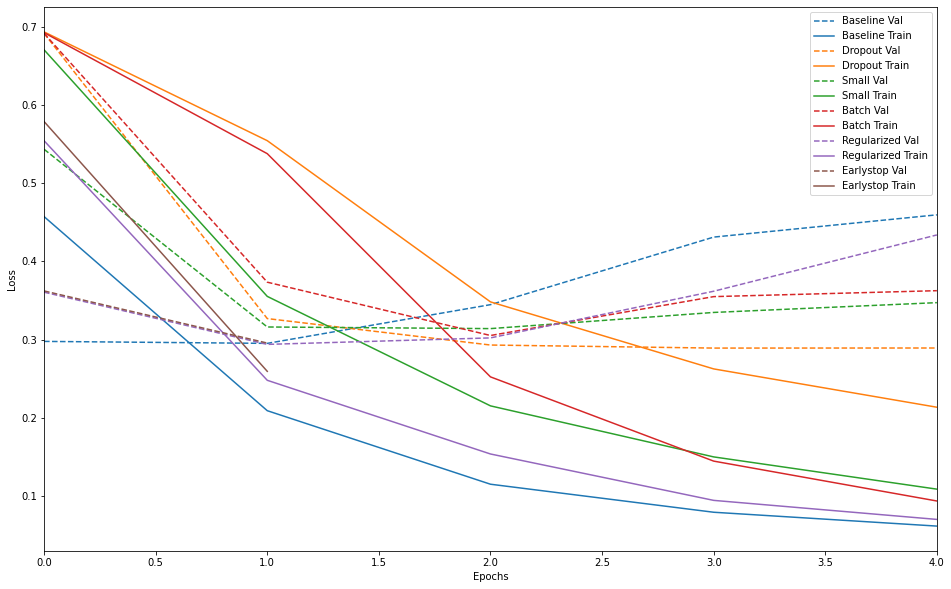

In [ ]:


plot_history([('baseline', FirstHistory),
              ('Dropout', DropHistory),
              ('Small', SmalHistory),
              ('Batch', BatchHistory),
              ('Regularized', RegHistory),
              ('earlystop', earlHistory)])

the test losses are in dotted lines and the train losses in full lines
What we can see is that apart from the dropout, all the test losses keep increasing after the second epoch but the dropout seems to be bottlenecked at around 0.3<br>
We cas see as well that the early stopping stops almost instantly.<br>
The rigth thing to do seems to be the droppout mixed with the early stopping and a smaller model.

## Trying to combine the best models

In [ ]:
EMBED_DIM = 4
LSTM_OUT = 6

NModel = Sequential()
NModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
NModel.add(Dropout(0.8))
NModel.add(LSTM(LSTM_OUT))
NModel.add(Dropout(0.8))
NModel.add(Dense(1, activation='sigmoid'))
NModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(NModel.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 130, 4)            369160    
                                                                 
 dropout_14 (Dropout)        (None, 130, 4)            0         
                                                                 
 lstm_12 (LSTM)              (None, 6)                 264       
                                                                 
 dropout_15 (Dropout)        (None, 6)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 369,431
Trainable params: 369,431
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=2
)

In [ ]:
nHistory = NModel.fit(x_train, y_train, batch_size = 128, epochs = 35,validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/35
313/313 [==============================] - 18s 51ms/step - loss: 0.6935 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 2/35
313/313 [==============================] - 16s 50ms/step - loss: 0.6931 - accuracy: 0.5007 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 3/35
313/313 [==============================] - 16s 50ms/step - loss: 0.6930 - accuracy: 0.5032 - val_loss: 0.6928 - val_accuracy: 0.5245
Epoch 4/35
313/313 [==============================] - 16s 50ms/step - loss: 0.6745 - accuracy: 0.5567 - val_loss: 0.5749 - val_accuracy: 0.7831
Epoch 5/35
313/313 [==============================] - 16s 50ms/step - loss: 0.5884 - accuracy: 0.6920 - val_loss: 0.4284 - val_accuracy: 0.8581
Epoch 6/35
313/313 [==============================] - 16s 50ms/step - loss: 0.5194 - accuracy: 0.7369 - val_loss: 0.3929 - val_accuracy: 0.8663
Epoch 7/35
313/313 [==============================] - 16s 50ms/step - loss: 0.4732 - accuracy: 0.7564 - val_loss: 0.3412 - val_accuracy:

In [ ]:
loss,accuracy = NModel.evaluate(x_train,y_train)

1250/1250 [==============================] - 10s 8ms/step - loss: 0.1563 - accuracy: 0.9505


In [ ]:
loss,accuracy = NModel.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2867 - accuracy: 0.8805


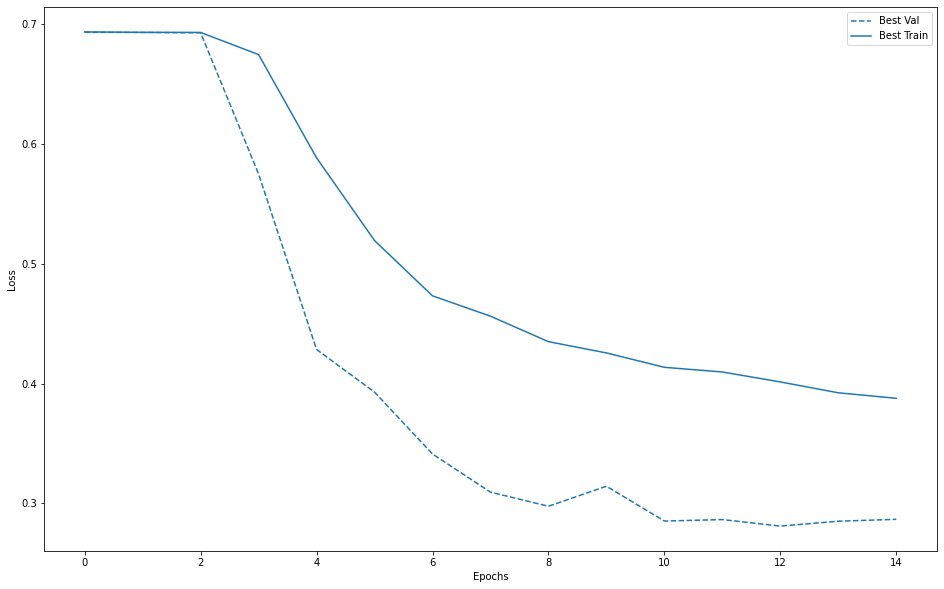

In [ ]:
plot_history([('Best', nHistory)])

With the use of all the tools combined we manage to have a much more controlled model<br>
This model is composed of two dropout layers of 0.8, with this we reduced the size of the other layers with `EMBED_DIM = 4 LSTM_OUT = 6 ` and finally we added a callback parameter EarlyStopping.<br>
The resulted graph shows a training loss that decreases much slower and therefor the test loss is much more controlled.

# Exercice 4

## imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import numpy as np     # for mathematic equation
import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten# layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   # save model
from tensorflow.keras.models import load_model   # load saved model
import tensorflow as tf
import tensorflow.keras
import os
from collections import defaultdict
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [ ]:
from nltk.corpus import stopwords   # to get collection of stopwords
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Retrieving the data

In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/TP_ESIR2/IA/ohsumed-first-20000-docs.tar.gz","/content/drive/MyDrive/TP_ESIR2/IA/")

In [ ]:


def get_info(path: str):
    data = list(os.walk(path))[1:]
    files = []
    for d in data:
        folder_name = d[0]
        for file in d[2]:
            files.append((folder_name.split('/')[-1], os.path.join(folder_name, file)))

    d = defaultdict(int)
    texts = defaultdict(list)
    for (cate, file) in files:
        with open(file, 'r') as outfile:
            text = outfile.read()
            texts[cate].append(text)
            words = text_to_word_sequence(text)
            for word in words:
                d[word] += 1
    words = sorted(d.items(), key=lambda x: x[1], reverse=True)
    return (texts, words)

In [ ]:
(TrainTexts,Trainwords) = get_info("/content/drive/MyDrive/TP_ESIR2/IA/ohsumed-first-20000-docs/training")

In [ ]:
(TestTexts,TestWords) = get_info("/content/drive/MyDrive/TP_ESIR2/IA/ohsumed-first-20000-docs/test")

## Creating the dataset

In [ ]:
df = pd.DataFrame()
for i in range(23):
  if(i<9):  
    tmp= pd.DataFrame(TrainTexts["C0"+str(i+1)])
    tmp["Class"] = "C0"+str(i+1)
    df= pd.concat([df,tmp])
  else:
    tmp= pd.DataFrame(TrainTexts["C"+str(i+1)])
    tmp["Class"] = "C"+str(i+1)
    df= pd.concat([df,tmp])



In [ ]:
df

,0,Class
0,Haemophilus influenzae meningitis with prolong...,C01
1,Mucosal intussusception to avoid ascending cho...,C01
2,Gastrointestinal function and structure in HIV...,C01
3,Epidemiology in bone and joint infection.\n Th...,C01
4,The diabetic foot. Soft tissue and bone infect...,C01
...,...,...
2148,Interruption of professional and home activity...,C23
2149,Effect of thiopental on neurologic outcome fol...,C23
2150,Recovery profile after desflurane-nitrous oxid...,C23
2151,Postoperative myocardial ischemia in patients ...,C23


In [ ]:
df.to_csv("/content/drive/MyDrive/TP_ESIR2/IA/test.csv")


## Dataset description

In [ ]:
dfTrain=pd.read_csv("/content/drive/MyDrive/TP_ESIR2/IA/training.csv")
dfTest=pd.read_csv("/content/drive/MyDrive/TP_ESIR2/IA/test.csv")

### Data distribution

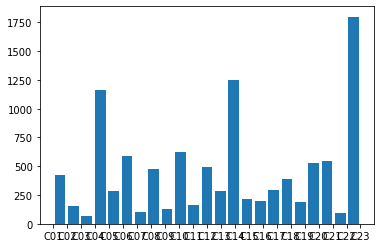

In [ ]:
plt.hist(dfTrain["Class"], bins = 23, rwidth = 0.8)
plt.show()

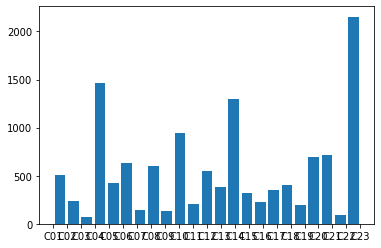

In [ ]:
plt.hist(dfTest["Class"], bins = 23, rwidth = 0.8)
plt.show()

Since the distribution for the test set and the train set are pretty similar, we can train a model on our train set and it will still work

### Words Description

#### Vocabulary size

In [ ]:
len(Trainwords)

NameError: ignored

In [ ]:
len(TestWords)

NameError: ignored

#### Word Distribution

In [ ]:
df = pd.DataFrame(Trainwords[0:20], columns=['word', 'frequency'])
df.plot(kind='bar', x='word')

NameError: ignored

In [ ]:
df = pd.DataFrame(TestWords[0:20], columns=['word', 'frequency'])
df.plot(kind='bar', x='word')

NameError: ignored

#### Most common / Least common

In [ ]:
Trainwords[0]

NameError: ignored

In [ ]:
Trainwords[-1]

NameError: ignored

In [ ]:
TestWords[0]

In [ ]:
TestWords[-1]

## Text cleaning

We start by naming the axis and removing a useless column

In [ ]:
english_stops = set(stopwords.words('english'))

In [ ]:
dfTrain = dfTrain.set_axis(["index",'text', 'class'], axis=1, inplace=False)
dfTest = dfTest.set_axis(["index",'text', 'class'], axis=1, inplace=False)


In [ ]:
dfTrain = dfTrain.drop(columns=["index"])
dfTest = dfTest.drop(columns=["index"])

### Removing non-alphabet, stopwords and lower-casing

In [ ]:
dfTrain["text"] = dfTrain["text"].replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
dfTrain["text"] = dfTrain["text"].apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
dfTrain["text"] = dfTrain["text"].apply(lambda review: [w.lower() for w in review])   # lower case

In [ ]:
dfTest["text"] = dfTest["text"].replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
dfTest["text"] = dfTest["text"].apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
dfTest["text"] = dfTest["text"].apply(lambda review: [w.lower() for w in review])   # lower case

In [ ]:
dfTrain["text"]

0        [augmentation, mentoplasty, using, mersilene, ...
1        [multiple, intracranial, mucoceles, associated...
2        [replacement, aortic, valve, cusp, neonatal, e...
3        [the, value, indium, leukocyte, scanning, eval...
4        [febrile, infants, less, eight, weeks, old, pr...
                               ...                        
10428    [afferent, nipple, valve, malfunction, caused,...
10429    [extracorporeal, shock, wave, lithotripsy, com...
10430    [tamm, horsfall, autoantibodies, interstitial,...
10431    [results, contemporary, radical, cystectomy, i...
10432    [total, bladder, replacement, using, detubular...
Name: text, Length: 10433, dtype: object

### Output cleaning

In [ ]:
labels = dfTest["class"].unique().tolist()#list of unique outputs
mapping = dict(zip(labels,range(len(labels))))#dictionnary between unique outputs and indexes
dfTest.replace({"class":mapping},inplace=True)#replacing outputs by there indexes in the dictionnary
dfTrain.replace({"class":mapping},inplace=True)

In [ ]:
y_train = dfTrain["class"]
y_test = dfTest["class"]

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=23)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=23)

## Retrieving train and test set

In [ ]:
x_train = dfTrain["text"]
x_test = dfTest["text"]

## Tokenize

In [ ]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [ ]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[ 5193 14808    77 ...     0     0     0]
 [  211  1075  8608 ...     0     0     0]
 [  553   218   365 ...     0     0     0]
 ...
 [ 4991  4992  2104 ...     0     0     0]
 [   20  5924   763 ...  1854   216  2528]
 [   86   422   553 ...     0     0     0]] 

Encoded X Test
 [[ 3705  2377  1165 ...     0     0     0]
 [  784 12827  1953 ...  1619  1710  2150]
 [  699    96  2161 ...   300   400   160]
 ...
 [  479  1571  4739 ...   194    77 10236]
 [  184   163   279 ...   346   184   279]
 [  835  7339  2064 ...     0     0     0]] 

Maximum review length:  112


In [ ]:
len(list(set(list(token.word_index.keys()))))

28308

## Model Building

In [ ]:
# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 128

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(23, activation='sigmoid'))
model.compile(optimizer = 'adam', loss=keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 112, 64)           1811776   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 23)                2967      
                                                                 
Total params: 1,913,559
Trainable params: 1,913,559
Non-trainable params: 0
_________________________________________________________________
None


## Model training

In [ ]:
keras.backend.clear_session()
FirstHistory = model.fit(x_train, y_train, batch_size = 32, epochs = 10,validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


327/327 [==============================] - 23s 53ms/step - loss: 2.8010 - accuracy: 0.1774 - val_loss: 2.7344 - val_accuracy: 0.1768
Epoch 2/10
327/327 [==============================] - 13s 39ms/step - loss: 2.6869 - accuracy: 0.2051 - val_loss: 2.6825 - val_accuracy: 0.2085
Epoch 3/10
327/327 [==============================] - 12s 38ms/step - loss: 2.5526 - accuracy: 0.2467 - val_loss: 2.6112 - val_accuracy: 0.2237
Epoch 4/10
327/327 [==============================] - 12s 38ms/step - loss: 2.4211 - accuracy: 0.2903 - val_loss: 2.5566 - val_accuracy: 0.2573
Epoch 5/10
327/327 [==============================] - 12s 37ms/step - loss: 2.3508 - accuracy: 0.3020 - val_loss: 2.5385 - val_accuracy: 0.2572
Epoch 6/10
327/327 [==============================] - 13s 39ms/step - loss: 2.1993 - accuracy: 0.3478 - val_loss: 2.5255 - val_accuracy: 0.2685
Epoch 7/10
327/327 [==============================] - 12s 38ms/step - loss: 2.0680 - accuracy: 0.3714 - val_loss: 2.5035 - val_accuracy: 0.2663
Epo

## Model evaluation

In [ ]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()


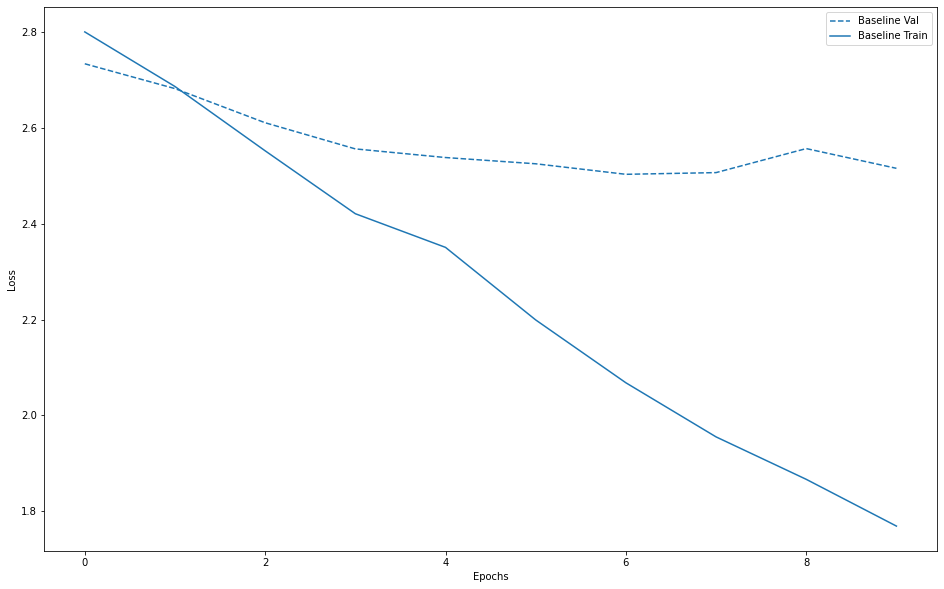

In [ ]:
plot_history([('baseline', FirstHistory)])

In [ ]:
loss,accuracy = model.evaluate(x_train,y_train)

327/327 [==============================] - 4s 13ms/step - loss: 1.6487 - accuracy: 0.4664


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

398/398 [==============================] - 5s 13ms/step - loss: 2.5160 - accuracy: 0.2684


Our results are quite disapointing. In order to achieve better performances, we will increase the complexity of the network and add dropout.

## Bigger Network

In [ ]:
# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 128

Bigmodel = Sequential()
Bigmodel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
Bigmodel.add(LSTM(LSTM_OUT))
Bigmodel.add(Dropout(0.2))
Bigmodel.add(Dense(128, activation='sigmoid'))
Bigmodel.add(Dropout(0.2))
Bigmodel.add(Dense(23, activation='sigmoid'))
Bigmodel.compile(optimizer = 'adam', loss=keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

print(Bigmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 112, 64)           1811776   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 23)                2967      
                                                                 
Total params: 1,930,071
Trainable params: 1,930,071
Non-

In [ ]:
keras.backend.clear_session()
BigHistory = Bigmodel.fit(x_train, y_train, batch_size = 16, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


653/653 [==============================] - 30s 42ms/step - loss: 2.8364 - accuracy: 0.1619 - val_loss: 2.7456 - val_accuracy: 0.1963
Epoch 2/5
653/653 [==============================] - 26s 40ms/step - loss: 2.7165 - accuracy: 0.1985 - val_loss: 2.7040 - val_accuracy: 0.2000
Epoch 3/5
653/653 [==============================] - 26s 40ms/step - loss: 2.6655 - accuracy: 0.2092 - val_loss: 2.6729 - val_accuracy: 0.2170
Epoch 4/5
653/653 [==============================] - 26s 40ms/step - loss: 2.6060 - accuracy: 0.2328 - val_loss: 2.6828 - val_accuracy: 0.2129
Epoch 5/5
653/653 [==============================] - 27s 41ms/step - loss: 2.5639 - accuracy: 0.2464 - val_loss: 2.6249 - val_accuracy: 0.2465


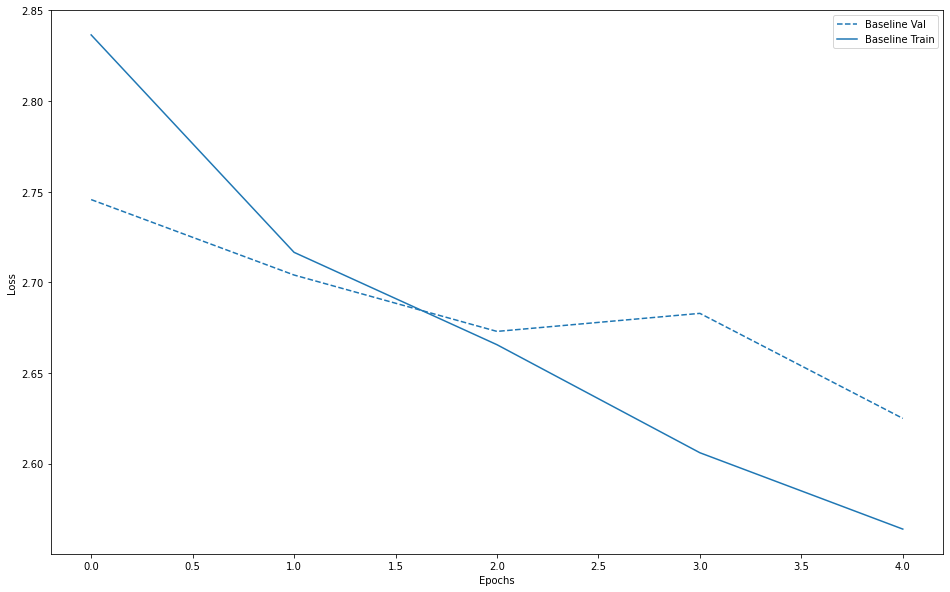

In [ ]:
plot_history([('baseline', BigHistory)])

In [ ]:
loss,accuracy = Bigmodel.evaluate(x_train,y_train)

327/327 [==============================] - 4s 12ms/step - loss: 2.4613 - accuracy: 0.2783


In [ ]:
loss,accuracy = Bigmodel.evaluate(x_test,y_test)

398/398 [==============================] - 5s 11ms/step - loss: 2.6249 - accuracy: 0.2465


The accuracy did not really increase by adding another layer, so we deduced that the problem was coming from somewhere else. So we decided to apply stemming to our data.

## Applying stemming

### Data treatment and imports

We start by importing the Lancaster stemmer from the nltk library  and retreiving the data from the dataset.

In [ ]:
from nltk.stem import LancasterStemmer
Lancaster = LancasterStemmer()

In [ ]:
x_trainStem = dfTrain["text"]
x_testStem = dfTest["text"]

We then make a function that we will apply to every review of the dataset. This function uses the stemmer to replace each word in a review by its stem so that our model can work on simpler data and be more efficient.

In [ ]:
def stemList(Li):
  StemLi =[]
  for word in Li:
    StemLi.append(Lancaster.stem(word))
  return StemLi

In [ ]:
x_trainStem=x_trainStem.apply(lambda x : stemList(x))

In [ ]:
x_testStem = x_testStem.apply(lambda x : stemList(x))

In [ ]:
x_trainStem[0][10:15]

['mentoplasty', 'howev', 'optim', 'impl', 'mat']

We can see here that words don't make any sense anymore and are just the "base" of words.

### Tokenizing

We then make the same treatment as before on our data by replacing each word by a number.

In [ ]:
def get_max_length():
    review_length = []
    for review in x_trainStem:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [ ]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_trainStem)
x_trainStem = token.texts_to_sequences(x_trainStem)
x_testStem = token.texts_to_sequences(x_testStem)

max_length = get_max_length()

x_trainStem = pad_sequences(x_trainStem, maxlen=max_length, padding='post', truncating='post')
x_testStem = pad_sequences(x_testStem, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_trainStem, '\n')
print('Encoded X Test\n', x_testStem, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[1564 9706    5 ...    0    0    0]
 [ 300 1037 4406 ...    0    0    0]
 [ 494  218  350 ...    0    0    0]
 ...
 [2932 3610 1463 ...    0    0    0]
 [  19 3935  610 ...  265   63 1309]
 [ 132  506  494 ...    0    0    0]] 

Encoded X Test
 [[2651 1941 1089 ...    0    0    0]
 [ 470 7928  870 ...   47  116    3]
 [ 752   74 1797 ...  296  369  168]
 ...
 [ 563 1090 2255 ...   70    5 1480]
 [ 210  204  205 ...  415  210  205]
 [ 488 2330 1595 ...    0    0    0]] 

Maximum review length:  112


In [ ]:
len(list(set(list(token.word_index.keys()))))

17479

We can see here that our number of data has decrease from 28308 words to 17489 words, which theorically, should help our model.

### Model

We decided to directly go to a bigger model and to keep the dropout while adding some early stopping to make the task easier.

In [ ]:
# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 128

Stemmodel = Sequential()
Stemmodel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
Stemmodel.add(LSTM(LSTM_OUT))
Stemmodel.add(Dense(528, activation='sigmoid'))
Stemmodel.add(Dropout(0.3))
Stemmodel.add(Dense(528, activation='sigmoid'))
Stemmodel.add(Dropout(0.3))
Stemmodel.add(Dense(23, activation='sigmoid'))
Stemmodel.compile(optimizer = 'adam', loss=keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

print(Stemmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 112, 64)           1118720   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 528)               68112     
                                                                 
 dropout (Dropout)           (None, 528)               0         
                                                                 
 dense_1 (Dense)             (None, 528)               279312    
                                                                 
 dropout_1 (Dropout)         (None, 528)               0         
                                                                 
 dense_2 (Dense)             (None, 23)                1

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

### Training

In [ ]:
keras.backend.clear_session()
StemHistory = Stemmodel.fit(x_trainStem, y_train, batch_size = 32, epochs = 50,callbacks =[callback],validation_data=(x_testStem, y_test))

Epoch 1/50
327/327 [==============================] - 18s 47ms/step - loss: 2.8510 - accuracy: 0.1714 - val_loss: 2.7853 - val_accuracy: 0.1848
Epoch 2/50
327/327 [==============================] - 15s 46ms/step - loss: 2.7584 - accuracy: 0.1863 - val_loss: 2.7715 - val_accuracy: 0.1768
Epoch 3/50
327/327 [==============================] - 15s 45ms/step - loss: 2.7301 - accuracy: 0.1923 - val_loss: 2.7102 - val_accuracy: 0.1901
Epoch 4/50
327/327 [==============================] - 15s 47ms/step - loss: 2.6402 - accuracy: 0.2257 - val_loss: 2.6383 - val_accuracy: 0.2398
Epoch 5/50
327/327 [==============================] - 16s 49ms/step - loss: 2.5566 - accuracy: 0.2581 - val_loss: 2.6070 - val_accuracy: 0.2497
Epoch 6/50
327/327 [==============================] - 15s 46ms/step - loss: 2.5030 - accuracy: 0.2723 - val_loss: 2.5865 - val_accuracy: 0.2495
Epoch 7/50
327/327 [==============================] - 15s 45ms/step - loss: 2.5251 - accuracy: 0.2637 - val_loss: 2.6082 - val_accuracy:

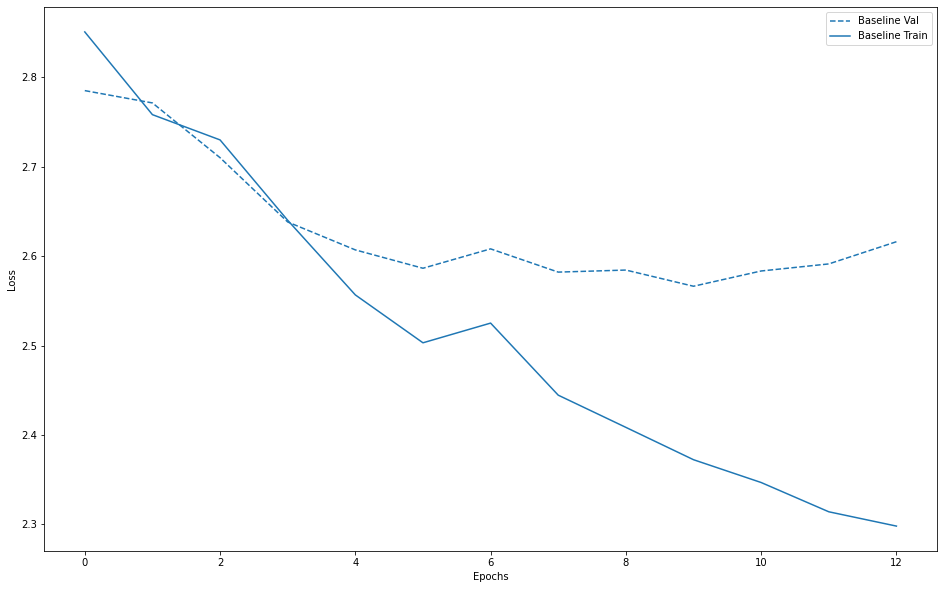

In [ ]:
plot_history([('baseline', StemHistory)])

Quite surprisingly, the prediction was not better than without the stemming. The early stopping made the model stop after it had started to overfit, but the best values we got were around 2,6. We decided to keep the stemmed dataset for the next models because we still believed it was better for the classification. Especially with the bigger dataset where we would have even more words.

## Regularization

In this part, we tried adding regularizationg to the previous model to try to reduce the overfitting.

In [ ]:
from tensorflow.keras import regularizers

### Model building

We tried different regularization like kernel, bias and activity. We ended up trying with regularization from [this](https://keras.io/api/layers/regularizers/) website.<br>
As the site says:<br>
*   kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
*   bias_regularizer: Regularizer to apply a penalty on the layer's bias
*   activity_regularizer: Regularizer to apply a penalty on the layer's outpu

In [ ]:
# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 128

Regmodel = Sequential()
Regmodel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
Regmodel.add(LSTM(LSTM_OUT))
Regmodel.add(Dense(528,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5), activation='sigmoid'))
Regmodel.add(Dropout(0.2))
Regmodel.add(Dense(528,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5), activation='sigmoid'))
Regmodel.add(Dropout(0.2))
Regmodel.add(Dense(23, activation='sigmoid'))
Regmodel.compile(optimizer = 'adam', loss=keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

print(Regmodel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 112, 64)           1118720   
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 528)               68112     
                                                                 
 dropout (Dropout)           (None, 528)               0         
                                                                 
 dense_1 (Dense)             (None, 528)               279312    
                                                                 
 dropout_1 (Dropout)         (None, 528)               0         
                                                                 
 dense_2 (Dense)             (None, 23)               

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

### Training

In [ ]:
keras.backend.clear_session()
RegHistory = Regmodel.fit(x_trainStem, y_train, batch_size = 32, epochs = 50,callbacks =[callback],validation_data=(x_testStem, y_test))

Epoch 1/50
327/327 [==============================] - 17s 44ms/step - loss: 3.0331 - accuracy: 0.1578 - val_loss: 2.9782 - val_accuracy: 0.1691
Epoch 2/50
327/327 [==============================] - 14s 42ms/step - loss: 2.9088 - accuracy: 0.1835 - val_loss: 2.8524 - val_accuracy: 0.1808
Epoch 3/50
327/327 [==============================] - 13s 41ms/step - loss: 2.8209 - accuracy: 0.1916 - val_loss: 2.8482 - val_accuracy: 0.1899
Epoch 4/50
327/327 [==============================] - 13s 41ms/step - loss: 2.7600 - accuracy: 0.2020 - val_loss: 2.7773 - val_accuracy: 0.2007
Epoch 5/50
327/327 [==============================] - 13s 41ms/step - loss: 2.7137 - accuracy: 0.2120 - val_loss: 2.7254 - val_accuracy: 0.2187
Epoch 6/50
327/327 [==============================] - 13s 40ms/step - loss: 2.7213 - accuracy: 0.2112 - val_loss: 2.8225 - val_accuracy: 0.2123
Epoch 7/50
327/327 [==============================] - 13s 40ms/step - loss: 2.6820 - accuracy: 0.2283 - val_loss: 2.7555 - val_accuracy:

### Evaluation

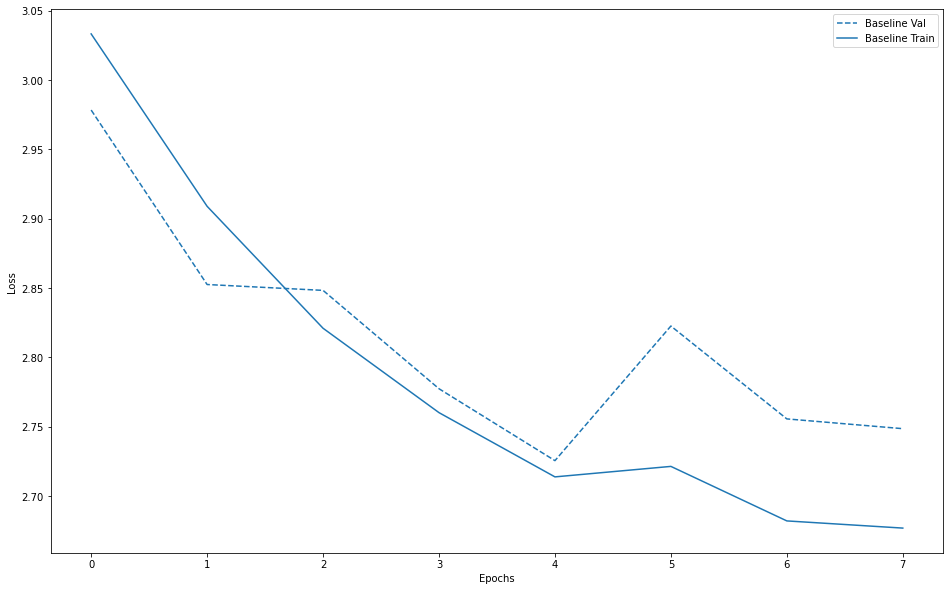

In [ ]:
plot_history([('baseline', RegHistory)])

Unfortunatly, none of the parameters that we tried actually worked, it did reduced the overfitting, but reduced its overall quality as well. We decided to not use it.

## Keras Tuner

After searching throught internet, We found a automatic model tuner called "keras tuner". Since we did not manage to get a good accuracy with our previous models we decided to try this to see if we could get better results.<br>
All the code is inspired by [this](https://www.tensorflow.org/tutorials/keras/keras_tuner) tutorial on the tensorflow website.

### Imports

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [ ]:
import keras_tuner as kt

### Model Building

In [ ]:
# ARCHITECTURE
EMBED_DIM = 64
def model_builder(hp):

  # Tune the number of units in the Dense layers
  # Choose an optimal value between 32-512
  hp_unitsd1 = hp.Int('unitsd1', min_value=32, max_value=512, step=32)
  hp_unitsd2 = hp.Int('unitsd2', min_value=32, max_value=512, step=32)

  #same for lstm_out
  LSTM_OUT = hp.Int('unitsLSTM', min_value=32, max_value=128, step=32)

  KerModel = Sequential()
  KerModel.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
  KerModel.add(LSTM(units=LSTM_OUT))
  KerModel.add(Dense(units=hp_unitsd1, activation='sigmoid'))
  KerModel.add(Dropout(0.3))
  KerModel.add(Dense(units=hp_unitsd2, activation='sigmoid'))
  KerModel.add(Dropout(0.3))
  KerModel.add(Dense(23, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  KerModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

  print(KerModel.summary())
  return KerModel

### Instanciating the tuner

To instanciate our tuner we need to specify the objective(val_accuracy) and the maximum number of epoch(10).

In [ ]:
Tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt',
                     overwrite=True,)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 112, 64)           1118720   
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 23)                7

We create a callback to stop the model after reaching a certain validation loss.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

### Running the tuner

Now we can run the tuner, the arguments are the same as the `model.fit()` method. The tuner will now try to find the best parameters for our network with the values that we specified. 

In [ ]:
Tuner.search(x_trainStem, y_train, epochs=50, validation_data=(x_testStem, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=Tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are {best_hps.get('unitsd1')} and {best_hps.get('unitsd2')}. The optimal units for the 
LSTM layer is {best_hps.get('unitsLSTM')}and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 02m 24s]
val_accuracy: 0.2707924246788025

Best val_accuracy So Far: 0.2866567075252533
Total elapsed time: 00h 32m 17s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are 128 and 192. The optimal units for the 
LSTM layer is 64and the optimal learning rate for the optimizer
is 0.01.



### Training with the optained parameters

We now use the parameters that we got from the tuner in our model and train it on 50 epoch. At the same time we check the best epoch that the model achieved so that we can use it again and get the best parameters possible.

In [ ]:
model = Tuner.hypermodel.build(best_hps)
history = model.fit(x_trainStem, y_train, epochs=50, validation_data=(x_testStem, y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 112, 64)           1118720   
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 192)               24768     
                                                                 
 dropout_3 (Dropout)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 23)               

In [ ]:
hypermodel = Tuner.hypermodel.build(best_hps)

# Retrain the model
hyperHistory = hypermodel.fit(x_trainStem, y_train, epochs=best_epoch, validation_data=(x_testStem, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 112, 64)           1118720   
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 192)               24768     
                                                                 
 dropout_5 (Dropout)         (None, 192)               0         
                                                                 
 dense_8 (Dense)             (None, 23)               

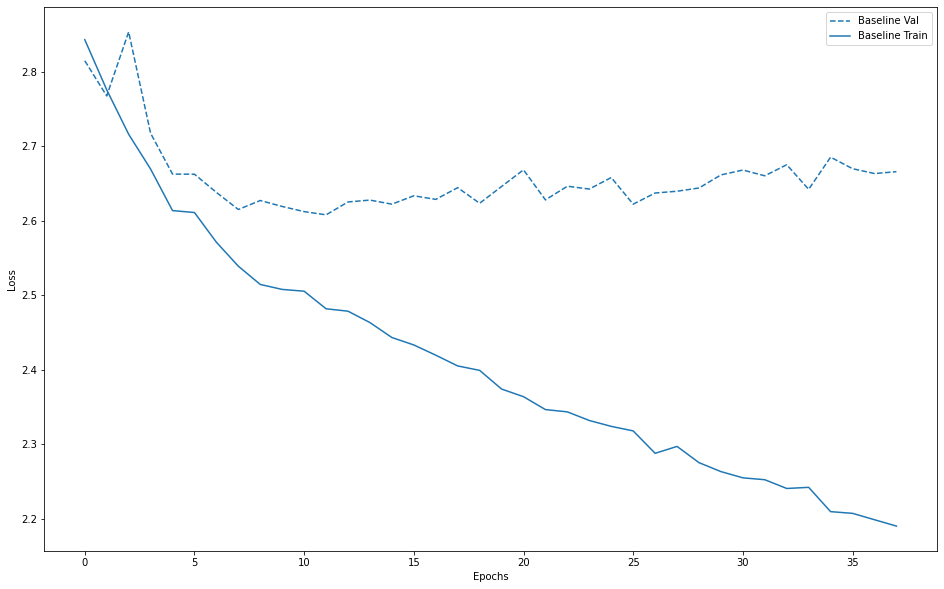

In [ ]:
plot_history([('baseline', hyperHistory)])

In [ ]:
eval_result = hypermodel.evaluate(x_testStem,y_test)

398/398 [==============================] - 4s 11ms/step - loss: 2.6656 - accuracy: 0.2491


Still not that good of a model even with the tuner, we will still try it on the biger dataset to see if it makes a difference.

## Changing the topology

In this part, we decided to try to use two bi-directionnal layers to see if our previous topology was the problem.

### Model

In [ ]:
BiModel = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(23)
])

In [42]:
BiModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Training the model

In [43]:
BiHistory = model.fit(x_trainStem, y_train, epochs=10,
                    validation_data=(x_testStem, y_test),
                    validation_steps=30)

Epoch 1/10
327/327 [==============================] - 10s 30ms/step - loss: 2.1575 - accuracy: 0.3311 - val_loss: 2.6386 - val_accuracy: 0.2534
Epoch 2/10
327/327 [==============================] - 9s 28ms/step - loss: 2.1478 - accuracy: 0.3336 - val_loss: 2.5793 - val_accuracy: 0.2647
Epoch 3/10
327/327 [==============================] - 8s 26ms/step - loss: 2.1384 - accuracy: 0.3427 - val_loss: 2.6027 - val_accuracy: 0.2541
Epoch 4/10
327/327 [==============================] - 8s 24ms/step - loss: 2.1368 - accuracy: 0.3403 - val_loss: 2.5981 - val_accuracy: 0.2676
Epoch 5/10
327/327 [==============================] - 8s 23ms/step - loss: 2.1375 - accuracy: 0.3399 - val_loss: 2.5803 - val_accuracy: 0.2597
Epoch 6/10
327/327 [==============================] - 8s 24ms/step - loss: 2.1304 - accuracy: 0.3372 - val_loss: 2.5725 - val_accuracy: 0.2592
Epoch 7/10
327/327 [==============================] - 8s 24ms/step - loss: 2.1335 - accuracy: 0.3398 - val_loss: 2.5915 - val_accuracy: 0.263

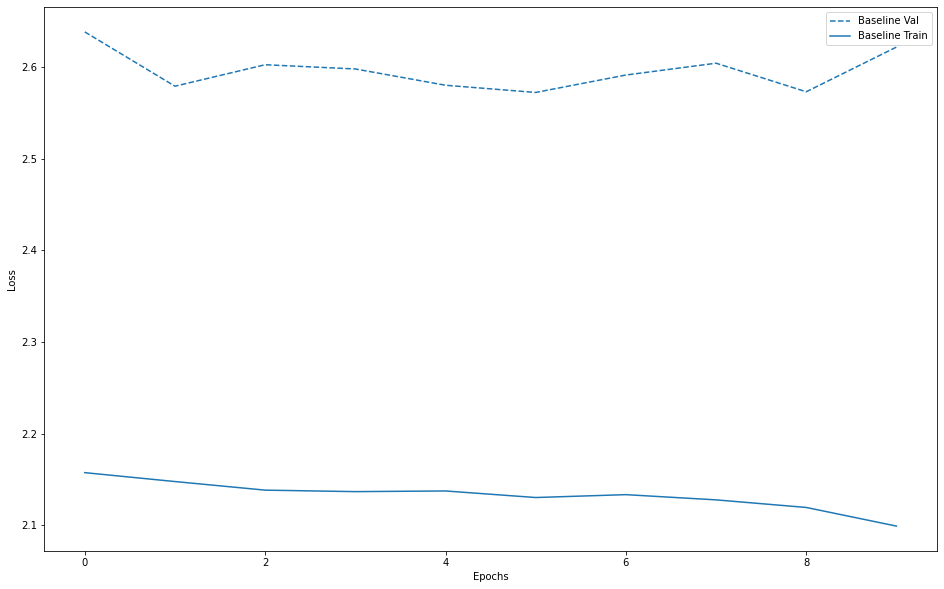

In [44]:
plot_history([('baseline', BiHistory)])

This model seems bottlenecked right from the begginning. Even tho the quality is slightly better than with the other model, we still believe the other model would perform better on the full dataset.

## Testing the model on the full dataset

### unpacking

In [45]:
shutil.unpack_archive("/content/drive/MyDrive/TP_ESIR2/IA/ohsumed-all-docs.tar.gz","/content/drive/MyDrive/TP_ESIR2/IA/")

In [46]:
def get_info(path: str):
    data = list(os.walk(path))[1:]
    files = []
    for d in data:
        folder_name = d[0]
        for file in d[2]:
            files.append((folder_name.split('/')[-1], os.path.join(folder_name, file)))

    d = defaultdict(int)
    texts = defaultdict(list)
    for (cate, file) in files:
        with open(file, 'r') as outfile:
            text = outfile.read()
            texts[cate].append(text)
            words = text_to_word_sequence(text)
            for word in words:
                d[word] += 1
    words = sorted(d.items(), key=lambda x: x[1], reverse=True)
    return (texts, words)

In [49]:
(AllTexts,Allwords) = get_info("/content/drive/MyDrive/TP_ESIR2/IA/ohsumed-all")

### Creating the dataset

In [50]:
df = pd.DataFrame()
for i in range(23):
  if(i<9):  
    tmp= pd.DataFrame(AllTexts["C0"+str(i+1)])
    tmp["Class"] = "C0"+str(i+1)
    df= pd.concat([df,tmp])
  else:
    tmp= pd.DataFrame(AllTexts["C"+str(i+1)])
    tmp["Class"] = "C"+str(i+1)
    df= pd.concat([df,tmp])

In [51]:
df.to_csv("/content/drive/MyDrive/TP_ESIR2/IA/Alltrain.csv")

#### Retrieving the dataset from the drive

In [68]:
dfAllTrain=pd.read_csv("/content/drive/MyDrive/TP_ESIR2/IA/Alltrain.csv")

### Text cleaning

We start by naming the axis and removing a useless column

In [69]:
english_stops = set(stopwords.words('english'))

In [70]:
dfAllTrain = dfAllTrain.set_axis(["index",'text', 'class'], axis=1, inplace=False)

In [71]:
dfAllTrain = dfAllTrain.drop(columns=["index"])

#### Removing non-alphabet, stopwords and lower-casing

In [72]:
dfAllTrain["text"] = dfAllTrain["text"].replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
dfAllTrain["text"] = dfAllTrain["text"].apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
dfAllTrain["text"] = dfAllTrain["text"].apply(lambda review: [w.lower() for w in review])   # lower case

In [73]:
dfAllTrain["text"]

0        [haemophilus, influenzae, meningitis, prolonge...
1        [augmentation, mentoplasty, using, mersilene, ...
2        [multiple, intracranial, mucoceles, associated...
3        [replacement, aortic, valve, cusp, neonatal, e...
4        [mucosal, intussusception, avoid, ascending, c...
                               ...                        
56979    [ionized, calcium, blood, studies, patients, p...
56980    [effects, immediate, postoperative, enteral, n...
56981    [effects, enteral, fat, emulsion, fat, absorpt...
56982    [inhibition, early, atherogenesis, transgenic,...
56983    [a, trna, lys, mutation, mtdna, causal, geneti...
Name: text, Length: 56984, dtype: object

#### Output cleaning

In [74]:
labels = dfAllTrain["class"].unique().tolist()#list of unique outputs
mapping = dict(zip(labels,range(len(labels))))#dictionnary between unique outputs and indexes
dfAllTrain.replace({"class":mapping},inplace=True)#replacing outputs by there indexes in the dictionnary

In [75]:
y_Alltrain = dfAllTrain["class"]

In [76]:
y_Alltrain = tf.keras.utils.to_categorical(y_Alltrain, num_classes=23)

#### Retrieving train and test inputs

In [77]:
x_Alltrain = dfAllTrain["text"]

#### Stemming

In [78]:
x_Alltrain=x_Alltrain.apply(lambda x : stemList(x))#the function stemList in defined in the previous part

#### Splitting into test and train set

In [64]:
from sklearn.model_selection import train_test_split       # for splitting dataset

In [79]:
x_Ftrain, x_Ftest, y_Ftrain, y_Ftest = train_test_split(x_Alltrain, y_Alltrain, test_size = 0.2)

### Tokenize

In [80]:
def get_max_length():
    review_length = []
    for review in x_Ftrain:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [81]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_Ftrain)
x_Ftrain = token.texts_to_sequences(x_Ftrain)
x_Ftest = token.texts_to_sequences(x_Ftest)

max_length = get_max_length()

x_Ftrain = pad_sequences(x_Ftrain, maxlen=max_length, padding='post', truncating='post')
x_Ftest = pad_sequences(x_Ftest, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_Ftrain, '\n')
print('Encoded X Test\n', x_Ftest, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[16308    62  1420 ...     0     0     0]
 [  433  8260   177 ...     0     0     0]
 [  340    30  1583 ...    74    90   943]
 ...
 [   19  4333   965 ...   513    26   163]
 [   55  5064     1 ...    22   276    15]
 [ 3095   698   751 ...     0     0     0]] 

Encoded X Test
 [[4651 1416  408 ...    0    0    0]
 [ 159   62  243 ...    8 4466  175]
 [4187 4057 4057 ...  944    0    0]
 ...
 [ 393  698 1729 ...    1 1360    7]
 [2321   62  243 ...    0    0    0]
 [3968 1723   16 ...    0    0    0]] 

Maximum review length:  115


In [82]:
len(list(set(list(token.word_index.keys()))))

34421

Not surprisingly we have more data so there are more words

### Model

We use the same model as the one found by the tuner
```
The hyperparameter search is complete. The optimal number of units in the densely-connected
layer are 128 and 192. The optimal units for the 
LSTM layer is 64and the optimal learning rate for the optimizer
is 0.01.
```



In [83]:
  FModel = Sequential()
  FModel.add(Embedding(total_words, 64, input_length = max_length))
  FModel.add(LSTM(units=64))
  FModel.add(Dense(units=128, activation='sigmoid'))
  FModel.add(Dropout(0.3))
  FModel.add(Dense(units=192, activation='sigmoid'))
  FModel.add(Dropout(0.3))
  FModel.add(Dense(23, activation='sigmoid'))


  FModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

  print(FModel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 115, 64)           2203008   
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 192)               24768     
                                                                 
 dropout_8 (Dropout)         (None, 192)               0         
                                                                 
 dense_13 (Dense)            (None, 23)               

### Training

In [86]:
Fhistory = FModel.fit(x_Ftrain, y_Ftrain, epochs=15, validation_data=(x_Ftest, y_Ftest))

Epoch 1/15
1425/1425 [==============================] - 47s 33ms/step - loss: 2.8061 - accuracy: 0.1753 - val_loss: 2.6985 - val_accuracy: 0.2065
Epoch 2/15
1425/1425 [==============================] - 46s 33ms/step - loss: 2.6162 - accuracy: 0.2343 - val_loss: 2.5868 - val_accuracy: 0.2406
Epoch 3/15
1425/1425 [==============================] - 44s 31ms/step - loss: 2.5410 - accuracy: 0.2542 - val_loss: 2.5223 - val_accuracy: 0.2537
Epoch 4/15
1425/1425 [==============================] - 45s 31ms/step - loss: 2.4690 - accuracy: 0.2790 - val_loss: 2.4392 - val_accuracy: 0.2876
Epoch 5/15
1425/1425 [==============================] - 44s 31ms/step - loss: 2.3884 - accuracy: 0.2966 - val_loss: 2.3859 - val_accuracy: 0.2942
Epoch 6/15
1425/1425 [==============================] - 44s 31ms/step - loss: 2.3439 - accuracy: 0.3106 - val_loss: 2.3836 - val_accuracy: 0.3042
Epoch 7/15
1425/1425 [==============================] - 45s 31ms/step - loss: 2.2999 - accuracy: 0.3202 - val_loss: 2.3333 -

### Evaluation

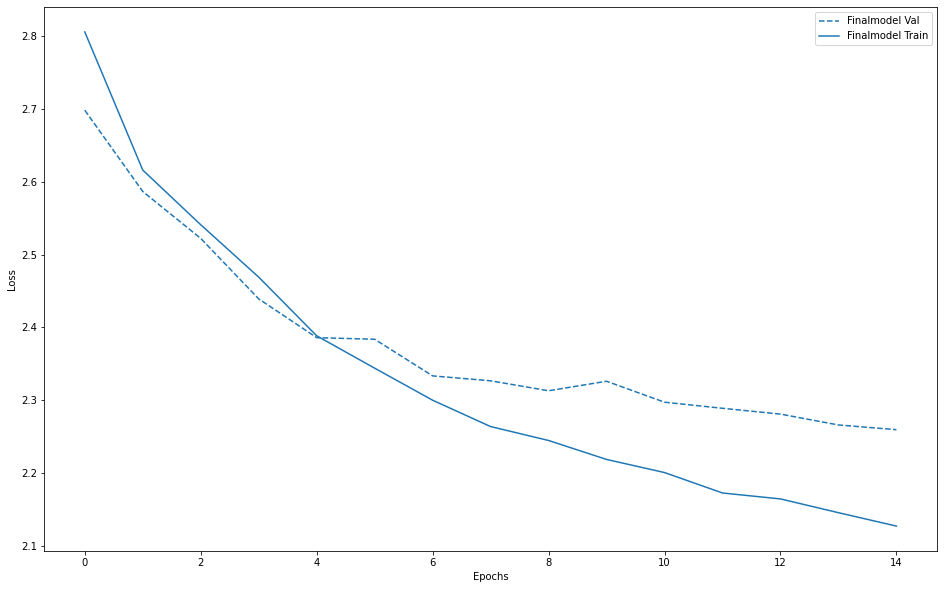

In [88]:
plot_history([('FinalModel', Fhistory)])

In [89]:
eval_result = FModel.evaluate(x_Ftest,y_Ftest)

357/357 [==============================] - 4s 11ms/step - loss: 2.2593 - accuracy: 0.3160


The accuracy is better than with the smaller dataset, we achieved over 0,31 which seems quite good compared to the maximum of 0,27 that we got earlier.<br>

---
### Conclusion
We can conclude that getting good accuracy with this kind of model is quite hard and we could try to get better accuracy by implementing more complicated models such as a TCN or a CNN-Gru. In this TP we learned how to tweak our model and reduce over and under-fitting. We also got a hang of the keras tuner which can be a really good asset to simplify hyper-parameters tuning. 